In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# transformation ref plane to physical plane
#linear combination of the shape function (Phi(E, eta)) and nodal values of the position

# the gradient is uniform inside the triangle

# by strang lemma, quality of integration accuracy is not enough, Fem loses order of accuracy

N = 8 #number of grid points
M = N - 1 # number of elements

# coordinate matrix
x= np.linspace(0, 1, N, endpoint=True)

#connectivity matrix
C = np.zeros((M, 2), dtype=int)
C[:, 0] = np.arange(N-1)
C[:, 1] = np.arange(1, N)
C

array([[0, 1],
       [1, 2],
       [2, 3],
       [3, 4],
       [4, 5],
       [5, 6],
       [6, 7]])

In [ ]:
# Define boundary conditions and source term
# -u''= f in (0,1)
# u(0) = u(1) = 0
# f(x) = 1
# exact solution: u_ex = 0.5*x*(1-x)

g = np.array((0,0))
f = lambda x: 1

In [ ]:
def assemble_system(N, M, x, C, f):
  A = np.zeros((N, N))
  Aref = np.array(((1, -1),
                    (-1,1)))

  # It is vector that contains the sizes so the measures of all the interval
  hvec = x[1:] - x[:-1] #ilki 2.noddan son noda kadar 2.terim ilk noddan sondan
  #bir önceki noda kadar. In this case it's uniform. Not in 2D and 3D case
  #this is going to be size of each element

  b = np.zeros(N) #initialize the rhs

  # Loop on the element(connectivity matrix)
  for i in range(M):
    #to selcet size of the element
    h = hvec[i]

    # Add the scaled reference matrix to the full matrix
    A[C[i,0], C[i,0]] += Aref[0,0]/h
    A[C[i,0], C[i,1]] += Aref[0,1]/h
    A[C[i,1], C[i,0]] += Aref[1,0]/h
    A[C[i,1], C[i,1]] += Aref[1,1]/h

    # Add the contribution to the right hand side
    x_b = 0.5 * (x[C[i,0]] + x[C[i,1]]) #the barycenter of the current element i

    # b[C[i,0]] += phi_0(x_b) * f(x_b) * dx
    b[C[i,0]] += 0.5 * f (x_b) * h
    b[C[i,1]] += 0.5 * f(x_b) * h

    #print(A)
    #input('Press enter to continue')


  return A, b

In [ ]:
# Assemble
A, b = assemble_system(N, M, x, C, f)

In [ ]:
def apply_bc(A, b, g):
  #left b.c.
  A[0, :] = 0
  A[0, 0] = 1
  b[0] = g[0]

  #right b.c.
  A[-1, :] = 0
  A[-1, -1] = 1
  b[-1] = g[1]

  return A, b

In [ ]:
# Apply b.c.s
A, b = apply_bc(A, b, g)
A

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-7., 14., -7.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -7., 14., -7.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -7., 14., -7.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -7., 14., -7.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -7., 14., -7.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -7., 14., -7.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [ ]:
# Solve the system
u = np.linalg. solve(A, b)

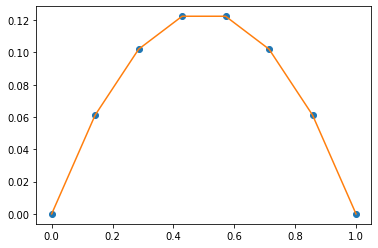

In [ ]:
# plot the solution
u_ex = lambda x: 0.5 * x * (1-x)

fig, ax = plt.subplots()
ax.plot(x, u, 'o') #everywhere(FEM)
ax.plot(x, u_ex(x))